###  Task- Performing Data Cleaning, and analysis on "Titanic" dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic=pd.read_csv("titanic_train.csv") 
#Loading dataset from the csv file into "Pandas Dataframe"
titanic.head() #Head shows the first 5 entries of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Performing Data Cleaning and Analysis
#### 1. Understanding meaning of each column:
<br>Data Dictionary:
<br>**Variable        Description**</br>
1. Survived	- Survived (1) or died (0)
2. Pclass -	Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. Name	- Passenger’s name
4. Sex -	Passenger’s sex
5. Age	- Passenger’s age
6. SibSp -	Number of siblings/spouses aboard
7. Parch -	Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
8. Ticket -	Ticket number
9. Fare -	Fare
10. Cabin -	Cabin
11. Embarked -	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### 2. Analysing which columns are completely useless in predicting the survival and deleting them
**Note** - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.



In [3]:
#Name column can never decide survival of a person, hence we can safely delete it
#Better to display the entire dataframe after a deletion of a column to get a better view
del titanic["Name"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
del titanic["PassengerId"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
del titanic["Ticket"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
#To see how many entries are there



titanic.shape

(891, 9)

In [7]:
#To see how many null entries are there in each column
#Here isnull() returns 1 if there is a null entry adding upon 
#which(using sum() function) we get number of null entries in each column 



titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
del titanic["Cabin"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
#Applying statistical approach on the above dataframe to analyse 
#which feature or column is affecting the survival rate and which is useless colum
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
del titanic["Fare"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#### We want to check if "Embarked" column is is important for analysis or not, that is whether survival of the person depends on the Embarked column value or not. 

In [11]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

survivedS = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedS

#similarly checked for C and S too and the results were
# Survived for C=93
# Survived for S=217

/Users/manishakhattar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


30

In [12]:
# Finding the number of people who have not survived 
# given that they have embarked or boarded from a particular port


survivedNS= titanic[titanic.Embarked=="Q"][titanic.Survived==0].shape[0]
survivedNS

#similarly checked for C and S too and the results were
# Not Survived for C = 75
# Not Survived for S = 427

/Users/manishakhattar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


47

As there are significant changes in the survival rate based on which port the passengers aboard the ship.
<br>
We cannot delete the whole embarked column(It is useful).
<br>
Now the Embarked column has two null values in it with total entries 891 rows and hence we can safely say that deleting two rows from 891 rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.
<br>
For the Null values in Embarked we can remove the rows with null values
<br>
perform **dropna()** on the Datafrem when only these values are present as null
<br>
titanic.dropna(inplace = True)
<br>
Note - inplace = True , so that the changes takes place in the same dataframe and not in the copy
<br>
titanic.shape

#### Changing Value for "Male, Female" string values to numeric values , male=1 and female=2

In [13]:
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["gender"]=titanic["Sex"].apply(getNumber)
#We have created a new column called "gender" and 
#filling it with values 1 ,2 based on the values of sex column
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,gender
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,2
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [14]:
#Deleting Sex column, since no use of it now
del titanic["Sex"]
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,gender
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,2
2,1,3,26.0,0,0,S,2
3,1,1,35.0,1,0,S,2
4,0,3,35.0,0,0,S,1


#### Drawing a pie chart for number of males and females aboard

577
314


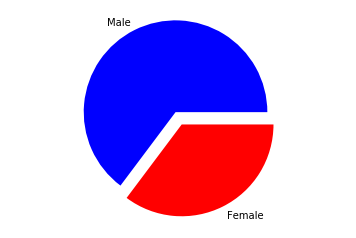

In [15]:
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['gender'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (titanic['gender'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p,    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['blue', 'red'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

#### Fill the null values of the Age column. Fill mean Survived age(mean age of the survived people) in the column where the person has survived and mean not Survived age (mean age of the people who have not survived) in the column where person has not survived

In [16]:
#finding mean survived age
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

#### Creating a new "age" column , filling values in it with a condition (given inside) if goes True then given values (here meanS) is put in place of last values else nothing happens, simply the values are copied from the "Age" column of the daatset  

In [17]:
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic

,Survived,Pclass,Age,SibSp,Parch,Embarked,gender,age
0,0,3,22.0,1,0,S,1,22.00000
1,1,1,38.0,1,0,C,2,38.00000
2,1,3,26.0,0,0,S,2,26.00000
3,1,1,35.0,1,0,S,2,35.00000
4,0,3,35.0,0,0,S,1,35.00000
5,0,3,NaN,0,0,Q,1,NaN
6,0,1,54.0,0,0,S,1,54.00000
7,0,3,2.0,3,1,S,1,2.00000
8,1,3,27.0,0,2,S,2,27.00000
9,1,2,14.0,1,0,C,2,14.00000


In [18]:
# Finding the mean age of "Not Survived" people
meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

Now the "age" column contains null entries in the places where survived is equal to zero.
<br>
Filling those null values in one go with meanNS 

In [19]:
titanic.age.fillna(meanNS,inplace=True)
titanic

,Survived,Pclass,Age,SibSp,Parch,Embarked,gender,age
0,0,3,22.0,1,0,S,1,22.000000
1,1,1,38.0,1,0,C,2,38.000000
2,1,3,26.0,0,0,S,2,26.000000
3,1,1,35.0,1,0,S,2,35.000000
4,0,3,35.0,0,0,S,1,35.000000
5,0,3,NaN,0,0,Q,1,30.626179
6,0,1,54.0,0,0,S,1,54.000000
7,0,3,2.0,3,1,S,1,2.000000
8,1,3,27.0,0,2,S,2,27.000000
9,1,2,14.0,1,0,C,2,14.000000


In [20]:
#We can safely delete the Age column
del titanic["Age"]
titanic

,Survived,Pclass,SibSp,Parch,Embarked,gender,age
0,0,3,1,0,S,1,22.000000
1,1,1,1,0,C,2,38.000000
2,1,3,0,0,S,2,26.000000
3,1,1,1,0,S,2,35.000000
4,0,3,0,0,S,1,35.000000
5,0,3,0,0,Q,1,30.626179
6,0,1,0,0,S,1,54.000000
7,0,3,3,1,S,1,2.000000
8,1,3,0,2,S,2,27.000000
9,1,2,1,0,C,2,14.000000


In [21]:
#Renaming "age" and "gender" columns
titanic.rename(columns={'age':'Age'}, inplace=True)
titanic.rename(columns={'gender':'Sex'}, inplace=True)
titanic.head()

,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,0,3,1,0,S,1,22.0
1,1,1,1,0,C,2,38.0
2,1,3,0,0,S,2,26.0
3,1,1,1,0,S,2,35.0
4,0,3,0,0,S,1,35.0


#### Now removing two rows where embarked value was null (Discussed in the beginning)

In [22]:
titanic.dropna(inplace=True)
titanic.head()

,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,0,3,1,0,S,1,22.0
1,1,1,1,0,C,2,38.0
2,1,3,0,0,S,2,26.0
3,1,1,1,0,S,2,35.0
4,0,3,0,0,S,1,35.0
